# Игры - анализ рекламных источников
**Описание проекта:**
Мобильная игра «Космические братья», в которой пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики. Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

**Цель исследования:**
Анализ и ранжирование эффективности показа рекламы игры «Космические братья» для выявления наиболее перспективой.

**Ход исследования:**  
1. Загрузка данных и изучение данной информации:
- импорт бибилиотек
- вывод первых 10 строк датасетов
- изучение основной информации
- вывод;
2. Предобработка данных:
- обработка явных дубликатов
- выявление пропущенных значений
- изменение типа данных
- вывод: исследование данных и ответы на вопросы;
3. Исследовательский анализ данных:
- количество пользователей завершивших игру
- время прохождения игры
- соотношение построек
- количество использованных источников трафика за весь период
- стоимость одного клика в зависимости от источника
4. Проверка гипотез
5. Итоговый вывод
6. Ответы на вопросы заказчика.

**Описание данных:**  
Датасет `game_actions.csv`:
- `event_datetime` — время события;
- `event` — одно из трёх событий:
1. `building` — объект построен,
2. `finished_stage_1` — первый уровень завершён,
3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
1. `assembly_shop` — сборочный цех,
2. `spaceport` — космопорт,
3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Датасет `ad_costs.csv`:
- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет `user_source.csv` содержит колонки:
- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший
приложение

# Материалы
* .[Презентация]. (https://disk.yandex.ru/i/Iw18_i_I4wO5lQ)
* .[Дашборд]. (https://public.tableau.com/app/profile/aitalina.danilova/viz/Yandex_Final_16946123996520/sheet2?publish=yes)

## Загрузка данных и изучение общей информации

In [79]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import warnings
from datetime import datetime, timedelta
from scipy import stats as st

In [80]:
#игнорирование предупреждений и ошибок при компиляции/запуске кода
import warnings
warnings.filterwarnings('ignore') 

#отображение всех чисел с двумя знаками после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

#уберем ограничение строк и столбцов в отображении
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [81]:
#откроем файл, присвоим переменную
try:    
    game_actions = pd.read_csv('/datasets/game_actions.csv')
    ad_costs = pd.read_csv('/datasets/ad_costs.csv')
    user_source = pd.read_csv('/datasets/user_source.csv')
except: 
    game_actions = pd.read_csv('https://code.s3.yandex.net/datasets/game_actions.csv')
    ad_costs = pd.read_csv('https://code.s3.yandex.net/datasets/ad_costs.csv')
    user_source = pd.read_csv('https://code.s3.yandex.net/datasets/user_source.csv')

In [82]:
game_actions.head(10)

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
5,2020-05-04 00:00:36,building,assembly_shop,06c592ca-902d-42bb-bac3-75ce84cca159,NaN
6,2020-05-04 00:00:36,building,assembly_shop,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN
7,2020-05-04 00:00:38,building,assembly_shop,beb8ca15-33a9-465d-b47b-89aa96f89c9a,NaN
8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN
9,2020-05-04 00:01:33,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,NaN


In [83]:
ad_costs.head(10)

,source,day,cost
0,facebook_ads,2020-05-03,935.88
1,facebook_ads,2020-05-04,548.35
2,facebook_ads,2020-05-05,260.19
3,facebook_ads,2020-05-06,177.98
4,facebook_ads,2020-05-07,111.77
5,facebook_ads,2020-05-08,68.01
6,facebook_ads,2020-05-09,38.72
7,instagram_new_adverts,2020-05-03,943.20
8,instagram_new_adverts,2020-05-04,502.93
9,instagram_new_adverts,2020-05-05,313.97


In [84]:
user_source.head(10)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
5,003b80c6-4164-4157-bb2a-03d0181d39c4,yandex_direct
6,003ee7e8-6356-4286-a715-62f22a18d2a1,instagram_new_adverts
7,004074f8-251a-4776-922c-8348dca1a2f6,facebook_ads
8,00440efd-aa50-4b4b-aae8-ffcd1782729d,facebook_ads
9,00464e5e-28ed-4be6-bf44-517ef7b3937b,yandex_direct


In [85]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [86]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [87]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


**Вывод:**
1. В датасете `games_actions`:
- **135640** строк **5** столбцов
- типы данных формата **object** содержат текстовые или смешанные числовые и нечисловые значения
2. В датасете `ad_costs`:
- **28** строк **3** столца
- типы данных **float64** в 1 столбце и **object** в 2 столбцах
3. В датасете `user_source`:
- **13576** строк 2 столбца
- оба столбца типа **object**

Названия столбцов не требуют изменений, требуется изменить тип данных в столбце `event_datetime` датасета `game_actions`.

## Предобработка данных

### Обработка дубликатов

In [88]:
#проверим датафрейм на явные дубликаты
game_actions.duplicated().sum()

1

In [89]:
ad_costs.duplicated().sum()

0

In [90]:
user_source.duplicated().sum()

0

In [91]:
#удалим выявленные неявные дубкликаты
game_actions= game_actions.drop_duplicates()

### Обработка пропусков

In [92]:
#посмотрим на долю пропусков в столбцах датафрейма games_actions
for col in game_actions.columns:
    missing_data = np.mean(game_actions[col].isnull())
    print('доля пропусков в столбце {} - {}%'.format(col, round(missing_data*100)))

доля пропусков в столбце event_datetime - 0%
доля пропусков в столбце event - 0%
доля пропусков в столбце building_type - 6%
доля пропусков в столбце user_id - 0%
доля пропусков в столбце project_type - 99%


В 2 столбцах наблюдается высокий процент пропущенных значений – от 6% до 90%, лучше не удалять строки с пропусками т.к. это повлияет на результаты исследования.
По условиям задачи у нас существует 2 способа завершить уровень - победа над первым врагом либо разработка орбитальной сборки спутников.

In [93]:
game_actions.loc[(game_actions['event'] == 'project') & (game_actions['project_type'].isna())]

,event_datetime,event,building_type,user_id,project_type


Значит, пропуски, действительно, не связаны с ошибкой сбора данных, как и говорил заказчик. Типы проекта не указаны там, где событие не связано с проектом. Посмотрим теперь на пропуски в типах строений

In [94]:
game_actions.loc[(game_actions['event'] == 'bulding') & (game_actions['building_type'].isna())]

,event_datetime,event,building_type,user_id,project_type


In [95]:
game_actions.loc[(game_actions['project_type'].isna()) & (game_actions['building_type'].isna())]['event'].unique()

array(['finished_stage_1'], dtype=object)

Где завершение уровня, там и пропущены типы строений и проектов. Такие пропуски не требуют замены или удаления, поэтому оставим их как есть.

### Изменение типа данных

In [96]:
#изменим тип данных для удобства
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'], format = '%Y-%m-%d')
display(game_actions.head())
game_actions.info()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 6.2+ MB


In [97]:
#изменим тип данных для удобства
ad_costs['day'] = pd.to_datetime(ad_costs['day'], format = '%Y-%m-%d')

### Проверка на ошибки в данных

In [98]:
# проверяем на то что игрок мог сыграть два и более раз
(game_actions[game_actions['event'] != 'building']
 .groupby(['user_id', 'event'])
 .agg({'event':'count'})
 .rename(columns={'event':'count'}).sort_values(by='count'))

,,count
user_id,event,
001d39dc-366c-4021-9604-6a3b9ff01e25,finished_stage_1,1
a9ff93bd-0b96-4e89-bef7-c29326643faf,finished_stage_1,1
a9fdac24-7f99-4c08-a4cd-32aaa4f45891,finished_stage_1,1
a9f014cc-fa01-475c-9002-a9dad7d2a1f9,finished_stage_1,1
a9c72aaf-a840-4871-8dd5-bf6f0dc42dee,project,1
...,...,...
52f1231a-50bc-49ad-aa1c-43355c6e9872,finished_stage_1,1
52c8f5fe-6d2b-495a-8985-d58941089fb9,finished_stage_1,1
52c654b7-2af1-41c9-98c4-1d657c263aa9,finished_stage_1,1


**Вывод:**
1. В датасете `games_actions`:
- был удален **1** явный дубликат
- переведен столбец `event_datetime` в формат datetime, а также был добавлен отдельный столбец дней
2. В датасете `ad_costs`:
- отсутствуют дубликаты
- переведен столбец `day` в в формат datetime
3. В датасете `user_source`:
- пропущенные значения отсутствуют
- отсутствуют дубликат
4. Обнаруженные пропуски не связаны с какими-либо ошибками при выгрузке, а вполне логичны и обоснованы (тип проекта пропущен в событиях, не связанных с проектами, а пропуски в типе объекта - в событиях, не связанных с построением объектов). Поэтому принято решение их не удалять и не заменять.
5. Ошибок в данных нет

## Исследовательский анализ данных

Изменим датасеты для наглядности и удобства.

Добавим источник пользователя.  
Выведем в отдельный столбец день, чтобы в дальнейшем было удобно группировать по дням.

In [99]:
game_actions = game_actions.merge(user_source, how='left', on='user_id')
game_actions['activity_day'] = game_actions['event_datetime'].dt.date

Добавляем время первого действия.  
Добавляем время последнего действия.

In [100]:
first_event = game_actions.groupby(['user_id']).agg(first_event_datetime = ('event_datetime', 'min')).reset_index()
game_actions = game_actions.merge(first_event, how='left', on='user_id')
game_actions['first_event_datetime'] = game_actions['first_event_datetime'].dt.date
last_event = game_actions.groupby(['user_id']).agg(last_event_datetime = ('event_datetime', 'max')).reset_index()
game_actions = game_actions.merge(last_event, how='left', on='user_id')
game_actions['last_event_datetime'] = game_actions['last_event_datetime'].dt.date

In [101]:
# добавляем lifetime в нашу таблицу
game_actions['cohort_lifetime'] = game_actions['activity_day'] - game_actions['first_event_datetime']
game_actions['cohort_lifetime'] = game_actions['cohort_lifetime'] / np.timedelta64(1,'D')
game_actions['cohort_lifetime'] = game_actions['cohort_lifetime'].round().astype('int')

Добавим количество дней пользователь провел в игре

In [102]:

time_in_game = game_actions.groupby('user_id')['cohort_lifetime'].max().reset_index()
time_in_game.columns = ['user_id', 'time_in_game']
game_actions = game_actions.merge(time_in_game, on='user_id')
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,source,activity_day,first_event_datetime,last_event_datetime,cohort_lifetime,time_in_game
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-04,2020-05-04,2020-05-10,0,6
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-05,2020-05-04,2020-05-10,1,6
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-05,2020-05-04,2020-05-10,1,6
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-05,2020-05-04,2020-05-10,1,6
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-06,2020-05-04,2020-05-10,2,6


Выведем отдельно пользователей, которые окончили уровень.

In [103]:
users_with_finish = game_actions[game_actions['event'] == 'finished_stage_1'].reset_index(drop=True)
users_with_finish = users_with_finish['user_id']

In [104]:
# пользователи со статусом "первый уровень получен"
finished = game_actions.query('user_id in @users_with_finish').reset_index(drop=True)
# пользователи со статусом "первый уровень не получен"
not_finished = game_actions.query('user_id not in @users_with_finish').reset_index(drop=True)


Выведем пользователей, которые окончили уровень через проект

In [105]:
users_with_project = finished[finished['event'] == 'project'].reset_index(drop=True)
users_with_project = users_with_project['user_id']

In [106]:
# пользователи, получившие первый уровень через проект
finished_with_project = finished.query('user_id in @users_with_project').reset_index(drop=True)
# пользователи, получившие первый уровень через победу над врагами
finished_without_project = finished.query('user_id not in @users_with_project').reset_index(drop=True)

Обрежем начальный датафрейм на 4 маленьких, чтобы разделить пользователей по источникам.

In [107]:
youtube = game_actions[game_actions['source'] == 'youtube_channel_reklama'].reset_index(drop=True)
yandex = game_actions[game_actions['source'] == 'yandex_direct'].reset_index(drop=True)
facebook = game_actions[game_actions['source'] == 'facebook_ads'].reset_index(drop=True)
instagram = game_actions[game_actions['source'] == 'instagram_new_adverts'].reset_index(drop=True)

### Количество пользователей завершивших игру

In [108]:
def precent_users(df, df2):
    users = df['user_id'].nunique()
    users_2 = df2['user_id'].nunique()
    precent = users_2 / users
    print('{:.1%}'.format(precent))

In [109]:
print('Закончили первый уровень:')
precent_users(game_actions, finished)
print('Не закончили первый уровень:')
precent_users(game_actions, not_finished)

Закончили первый уровень:
42.8%
Не закончили первый уровень:
57.2%


In [110]:
print('Закончили первый уровень:с yandex')
precent_users(yandex, finished[finished['source'] == 'yandex_direct'])
print('Не закончили первый уровень:с yandex')
precent_users(yandex, not_finished[not_finished['source'] == 'yandex_direct'])

Закончили первый уровень:с yandex
42.4%
Не закончили первый уровень:с yandex
57.6%


In [111]:
print('Закончили первый уровень: c youtube')
precent_users(youtube, finished[finished['source'] == 'youtube_channel_reklama'])
print('Не закончили первый уровень: c youtube')
precent_users(youtube, not_finished[not_finished['source'] == 'youtube_channel_reklama'])

Закончили первый уровень: c youtube
43.1%
Не закончили первый уровень: c youtube
56.9%


In [112]:
print('Закончили первый уровень: c facebook')
precent_users(facebook, finished[finished['source'] == 'facebook_ads'])
print('Не закончили первый уровень: c facebook')
precent_users(facebook, not_finished[not_finished['source'] == 'facebook_ads'])

Закончили первый уровень: c facebook
42.2%
Не закончили первый уровень: c facebook
57.8%


In [113]:
print('Закончили первый уровень: c instagram')
precent_users(instagram, finished[finished['source'] == 'instagram_new_adverts'])
print('Не закончили первый уровень: c instagram')
precent_users(instagram, not_finished[not_finished['source'] == 'instagram_new_adverts'])

Закончили первый уровень: c instagram
43.8%
Не закончили первый уровень: c instagram
56.2%


**Большинство пользователей не закончили первый уровень.**

In [114]:
print('Закончили первый уровень победой:')
precent_users(finished, finished_without_project)
print('Закончили первый уровень проектом:')
precent_users(finished, finished_with_project)

Закончили первый уровень победой:
67.9%
Закончили первый уровень проектом:
32.1%


### Врем прохождения с разбивкой по каналам

In [115]:
#cреднее время в игре пользователей, которые завершили первый уровень
finished['time_in_game'].median()

12.0

In [116]:
#cреднее время в игре пользователей, которые не завершили первый уровень
not_finished['time_in_game'].median()

11.0

In [117]:
#cреднее время в игре пользователей, которые завершили первый уровень через проект
finished_with_project['time_in_game'].median()


13.0

In [118]:
#cреднее время в игре пользователей, которые завершили первый уровень через победу над врагом
finished_without_project['time_in_game'].median()

11.0

**Прохождение уровня через проект занимает на 2 дня больше**

In [119]:
def time_in_game_plot(df, name):
    tig = df.groupby('time_in_game')['user_id'].nunique().reset_index()
    plt.figure(figsize=(12,5))
    plt.plot(tig['time_in_game'], tig['user_id'], marker = 'o');
    plt.title(f'Количество дней в игре на одного пользователя: {name}', fontsize=17);
    plt.xlabel('Дни в игре', fontsize = 15) 
    plt.ylabel('Пользователи', fontsize = 15) 

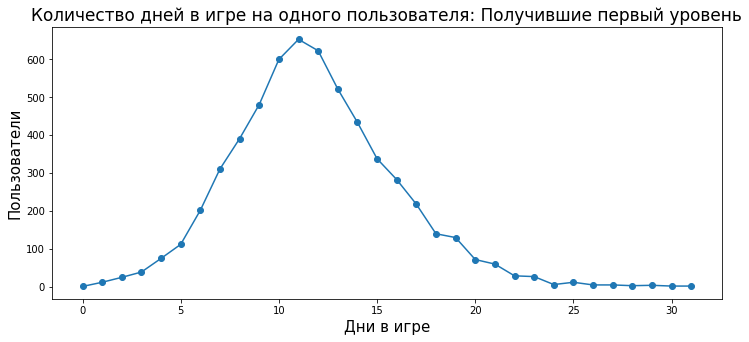

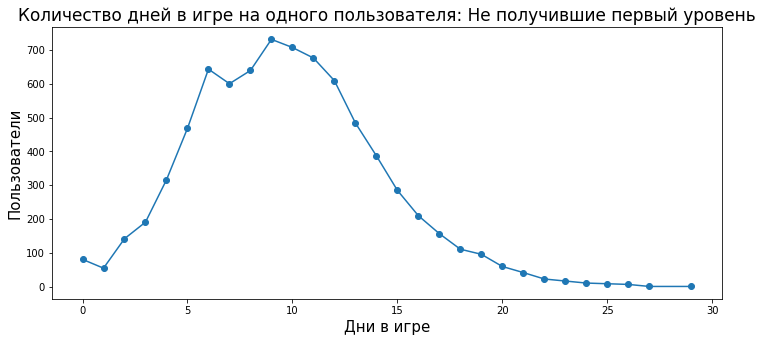

In [120]:
time_in_game_plot(finished, 'Получившие первый уровень')
time_in_game_plot(not_finished, 'Не получившие первый уровень')

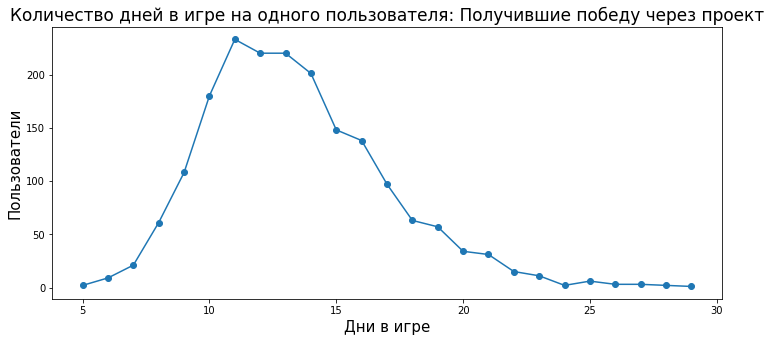

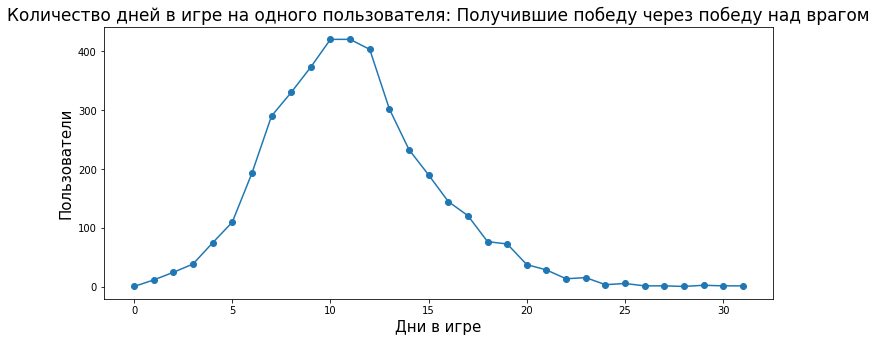

In [121]:
time_in_game_plot(finished_with_project, 'Получившие победу через проект')
time_in_game_plot(finished_without_project, 'Получившие победу через победу над врагом')

**Оба графики имеют примерно одинаковое смещение в левую сторону. Данные представлены тех, кто получил первый уровень. А это значит, что какие-то пользователи получили первый уровень в течение 2-4х дней (активные игроки, видимо). А кто-то получает уровень по 30 дней.**

Функция для расчета и построения графика со временем, проведенным в игре, в зависимости от источника и типа стратегии.

In [122]:
def tig_source_plot(df, name):
    tig = df.pivot_table(index = 'time_in_game',
                           columns = 'source',
                           values = 'user_id',
                           aggfunc = 'nunique')
    ax = tig.plot(figsize=(12,5), marker='o');
    ax.set_title(f'Время в игре: {name}', fontsize=17);
    ax.set_xlabel('Дни', fontsize=15);
    ax.set_ylabel('Пльзователи', fontsize=15);

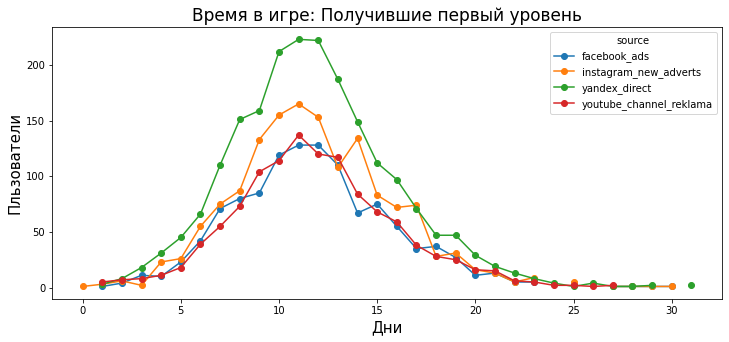

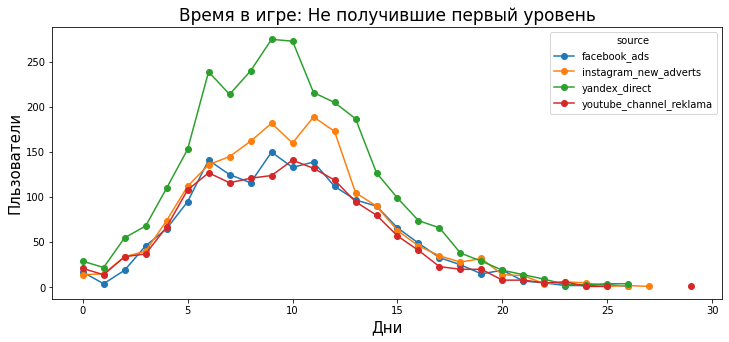

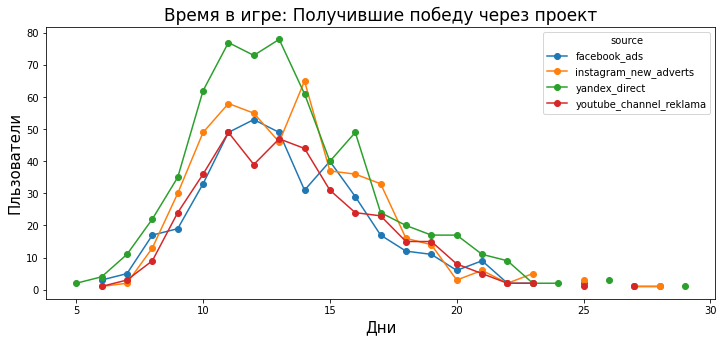

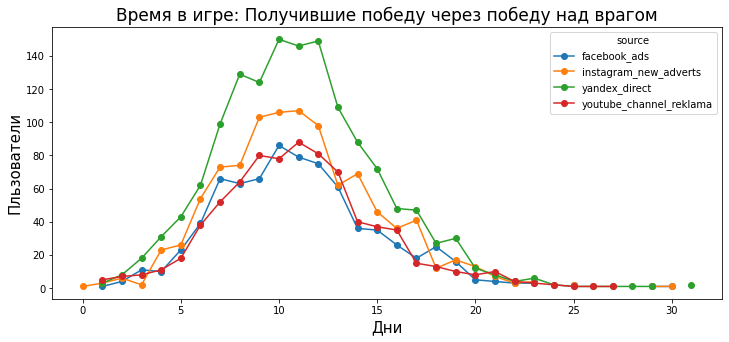

In [123]:
tig_source_plot(finished, 'Получившие первый уровень')
tig_source_plot(not_finished, 'Не получившие первый уровень')
tig_source_plot(finished_with_project, 'Получившие победу через проект')
tig_source_plot(finished_without_project, 'Получившие победу через победу над врагом')

1. график - время в игре по источникам пользователей, которые достигли первый уровень
2. график - время в игре по источникам пользователей, которые не достигли первый уровень
3. график - время в игре по источникам пользователей, которые достигли первый уровень с помощью победы
4. график - время в игре по источникам пользователей, которые достигли первый уровень с помощью проекта

Выведем среднее время в игре с разбивкой по каналам

In [124]:
print('Среднее время в игре пользователей, пришедших из yandex:', yandex['time_in_game'].median())
print('Среднее время в игре пользователей, пришедших c facebook:', facebook['time_in_game'].median())
print('Среднее время в игре пользователей, пришедших из instagram:', instagram['time_in_game'].median())
print('Среднее время в игре пользователей, пришедших с youtube:', youtube['time_in_game'].median())

Среднее время в игре пользователей, пришедших из yandex: 11.0
Среднее время в игре пользователей, пришедших c facebook: 11.0
Среднее время в игре пользователей, пришедших из instagram: 11.0
Среднее время в игре пользователей, пришедших с youtube: 11.0


**Независимо от источника среднее время прохождения составляет 11 дней**

### Количество пользователей пришедших с каждого источника трафика

In [125]:
user_total = (user_source
              .groupby('source')
              .agg({'user_id':'nunique'})
              .rename(columns={'user_id':'users'})
              .round({'users': 2}))
user_total

,users
source,
facebook_ads,2726
instagram_new_adverts,3347
yandex_direct,4817
youtube_channel_reklama,2686


In [126]:
print('\033[1m' + 'Наибольшая количество пользователей у источника: ' + '\033[0m' + '{} - {}'
      .format(user_total['users'].idxmax(),
              user_total['users'].max()))

print('\033[1m' + 'Наименьшее количество пользователей у источника: ' + '\033[0m' + '{} - {}'
      .format(user_total['users'].idxmin(),
              user_total['users'].min()))

Наибольшая количество пользователей у источника: yandex_direct - 4817
Наименьшее количество пользователей у источника: youtube_channel_reklama - 2686


In [127]:
count_users = user_source.groupby('source')['user_id'].count().sort_values(ascending=False).reset_index()
print('Количество пользователей по источникам')
display(count_users)
print(' ')
print('Суммарные рекламные затраты по источникам')
sum_add = ad_costs.groupby('source')['cost'].sum().sort_values(ascending=False).reset_index()
display(sum_add)
print(' ')
sum_add['mean_cost'] = (sum_add['cost'] / count_users['user_id'])
print('Средняя стоимость одного пользователя по источникам')
display(sum_add)

Количество пользователей по источникам


,source,user_id
0,yandex_direct,4817
1,instagram_new_adverts,3347
2,facebook_ads,2726
3,youtube_channel_reklama,2686


 
Суммарные рекламные затраты по источникам


,source,cost
0,yandex_direct,2233.11
1,instagram_new_adverts,2161.44
2,facebook_ads,2140.90
3,youtube_channel_reklama,1068.12


 
Средняя стоимость одного пользователя по источникам


,source,cost,mean_cost
0,yandex_direct,2233.11,0.46
1,instagram_new_adverts,2161.44,0.65
2,facebook_ads,2140.90,0.79
3,youtube_channel_reklama,1068.12,0.40


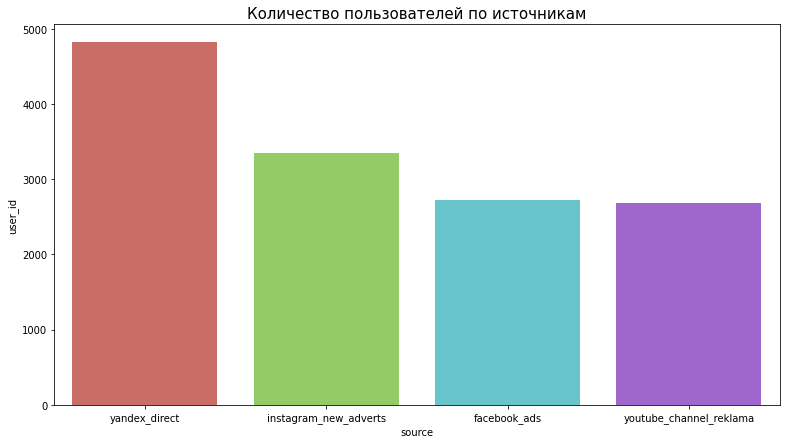

In [128]:
plt.figure(figsize=(13, 7))
plt.title('Количество пользователей по источникам', fontsize=15)
sns.barplot(x = 'source', y = 'user_id', palette = 'hls', data = count_users);

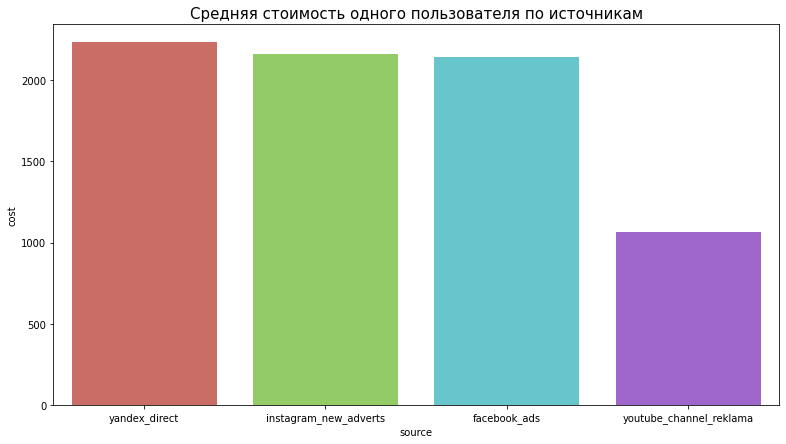

In [129]:
plt.figure(figsize=(13, 7))
plt.title('Средняя стоимость одного пользователя по источникам', fontsize=15)
sns.barplot(x = 'source', y = 'cost', palette = 'hls', data = sum_add);

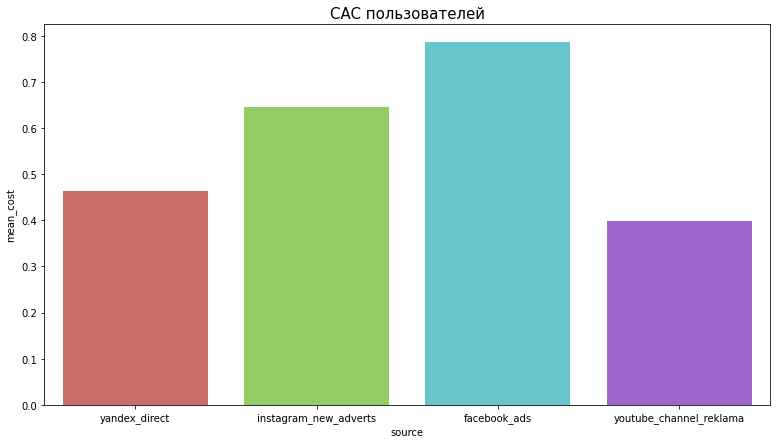

In [130]:
plt.figure(figsize=(13, 7))
plt.title('CAC пользователей', fontsize=15)
sns.barplot(x = 'source', y = 'mean_cost', palette = 'hls', data = sum_add);

1.  `yandex_direct` - 4817 пользователей, также это самая затратная за все дни площадка - 2233,11. Но за счет большого количества пользователей стоимость одного не так велика - 0,46. 
2.  `instagram_new_adverts` второй по дороговизне источник - 2161,44. Пришло пользователей на 1500 человек меньше - 3347, чем с `yandex_direct`, а затраты почти одинаковы - 2161,44.
3. `facebook_ads` - третий по дороговизне источник - 2140,90. По количеству пользователей за все время пришло чуть больше, чем с `youtube_channel_reklama` - 2726.
4. Меньше всего приходит с `youtube_channel_reklama` - 2686 , но и затраты тоже малы - 1068,12 , следовательно средняя стоимость одного пользователя также мала - 0,40.

### Распределение количества построек по видам

In [131]:
builds = game_actions.groupby('building_type')['user_id'].count()
builds.sort_values(ascending=False)

building_type
spaceport          59325
assembly_shop      54494
research_center    14137
Name: user_id, dtype: int64

**Видно, что по данным самые популярные постройки `spaceport` и `assembly_shop`, видимо они самая дешевая и самые первые из возможных**

In [132]:
builds = game_actions.pivot_table(index = 'activity_day',
                            columns = 'building_type',
                            values = 'user_id',
                            aggfunc = 'count')

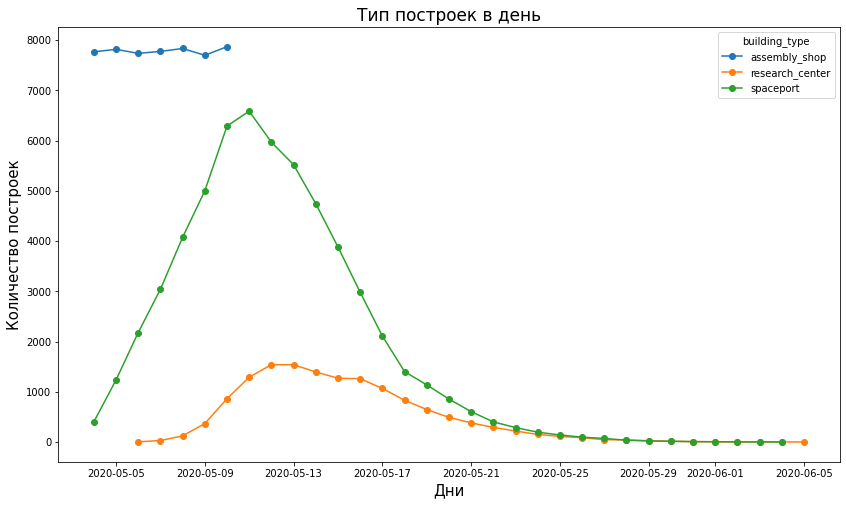

In [133]:
ax = builds.plot(figsize=(14,8), marker='o');
ax.set_title('Тип построек в день', fontsize=17);
ax.set_xlabel('Дни', fontsize=15);
ax.set_ylabel('Количество построек', fontsize=15);

**Видим, что `assembly_shop` можно назвать "стартовой" постройкой. И все 9 дней, по которым у нас привлекались новые пользователи, эти постройки строятся в большом количестве. Вторая по популяности постройка - это `spaceport`. Пиковое значение в количестве построек в день набюдается `11/05`, когда уже все пользватели привлечены и строят по максимуму. Редкая постройка - это `research_center`. Первые постройки произошли спустя 2 дня япосле привлечения первых пользователей. Пиковые значения наблюдаются `12-13/05`, спустя 2-3 дня после привлечения последних новых пользователей. После 17/05 все постройки пошли на спад, а с 23/05 количество `spaceport` и `research_center` сравнялось.**

### Среднее количество построек на одного пользователя с разбивкой по кналам привлечения

In [134]:
def building(df, name):
    user_build = df.groupby('user_id')['building_type'].count().reset_index()
    user_build.hist(bins=20, figsize=(12,5));
    plt.title(f'Количество построек на пользователя: {name}', fontsize=17);
    plt.xlabel('Количество построек', fontsize = 15) 
    plt.ylabel('Количество пользователей', fontsize = 15);
    print('Среднее количество построек: {:.1f}'.format(user_build['building_type'].sum() / user_build['user_id'].count()))

Среднее количество построек: 9.4


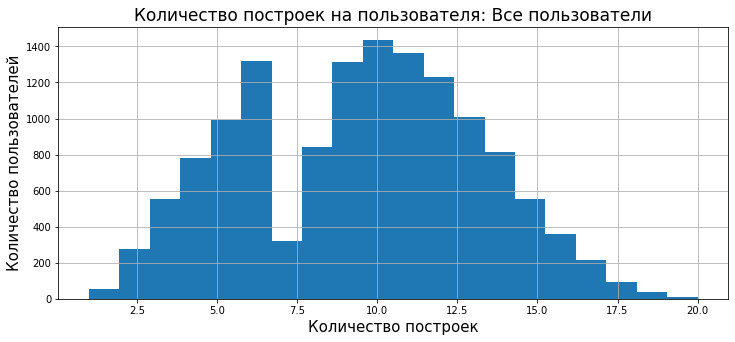

In [135]:
building(game_actions, 'Все пользователи')

**На графике есть отклонение в районе 7-8 построек. Скорее всего пользователи либо строят до этого количества и побеждают врага, либо продолжают строить дальше. Либо кто-то еще не достиг первого уровня и пока что остановился на 7-8 поостройках. Среднее количество построек - 9**

Среднее количество построек: 9.3
Среднее количество построек: 9.5
Среднее количество построек: 9.6
Среднее количество построек: 9.3


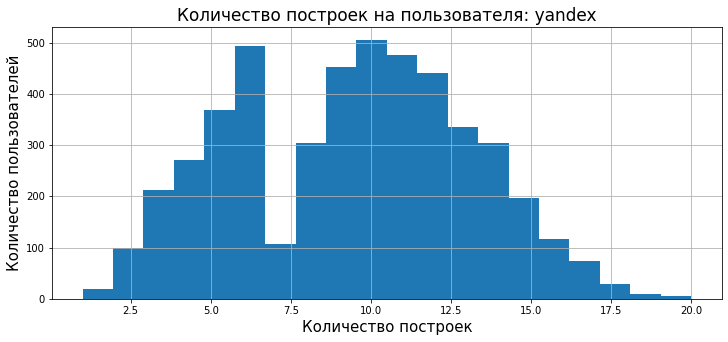

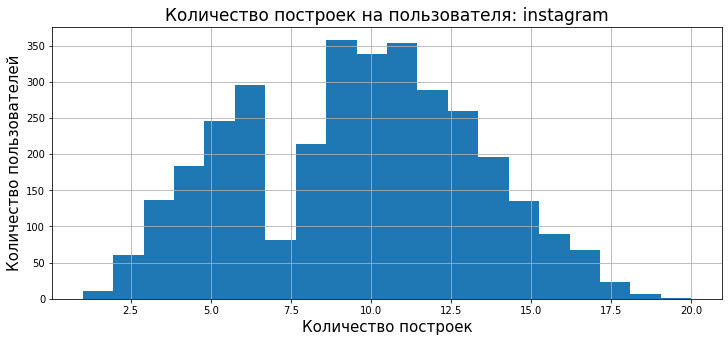

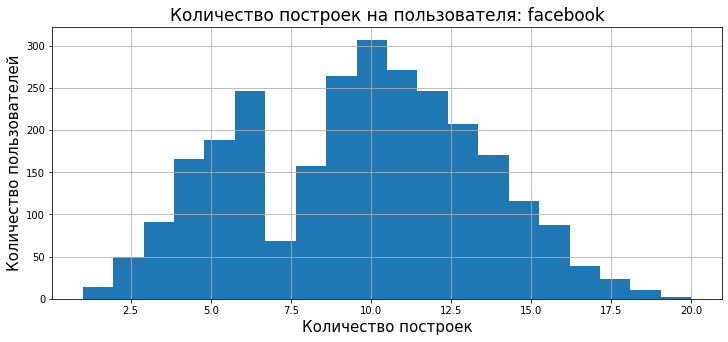

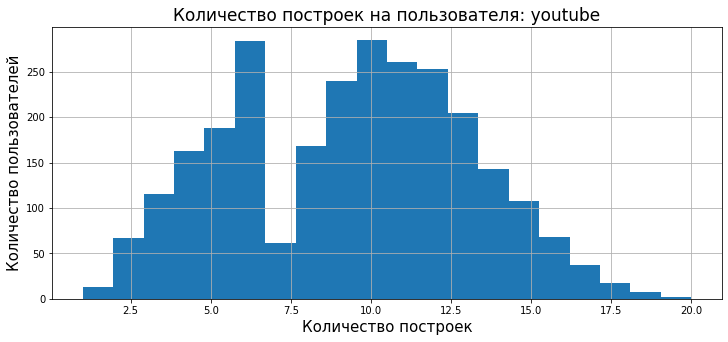

In [136]:
building(yandex, 'yandex')
building(instagram, 'instagram')
building(facebook, 'facebook')
building(youtube, 'youtube')

**Независимо от источника привлечения количество построек имеет лишь небольшую разницу.**

**Вывод:**  
1. Закончили первый уровень - `42.8%` от всех пользователей
2. Независимо от источника среднее время прохождения составляет `11 дней`
3. Среднее количество событий на пользователя - `10.0`
4. 
- yandex_direct - 4817 пользователей, также это самая затратная за все дни площадка - 2233,11. Но за счет большого количества пользователей стоимость одного не так велика - 0,46.
- instagram_new_adverts второй по дороговизне источник - 2161,44. Пришло пользователей на 1500 человек меньше - 3347, чем с yandex_direct, а затраты почти одинаковы - 2161,44.
- facebook_ads - третий по дороговизне источник - 2140,90. По количеству пользователей за все время пришло чуть больше, чем с youtube_channel_reklama - 2726.
- Меньше всего приходит с youtube_channel_reklama - 2686 , но и затраты тоже малы - 1068,12 , следовательно средняя стоимость одного пользователя также мала - 0,40
5. Среднее количество построек - 9.

## Проверка гипотез

### Время завершения уровня не различается от способа прохождения

In [137]:
finished_with_project['first_event_datetime'] = pd.to_datetime(finished_with_project['first_event_datetime'])
finished_with_project['last_event_datetime'] = pd.to_datetime(finished_with_project['last_event_datetime'])
finished_with_project['time_in_game_hour'] = finished_with_project['last_event_datetime'] - finished_with_project['first_event_datetime']
finished_with_project['time_in_game_hour'] = finished_with_project['time_in_game_hour'] / np.timedelta64(1, 'h')

In [138]:
finished_without_project['first_event_datetime'] = pd.to_datetime(finished_without_project['first_event_datetime'])
finished_without_project['last_event_datetime'] = pd.to_datetime(finished_without_project['last_event_datetime'])
finished_without_project['time_in_game_hour'] = finished_without_project['last_event_datetime'] - finished_without_project['first_event_datetime']
finished_without_project['time_in_game_hour'] = finished_without_project['time_in_game_hour'] / np.timedelta64(1, 'h')

In [139]:
fight = finished_without_project.groupby('time_in_game_hour')['user_id'].nunique()
project = finished_with_project.groupby('time_in_game_hour')['user_id'].nunique()

In [140]:
fight = finished_without_project.groupby('user_id')['time_in_game_hour'].unique()
project = finished_with_project.groupby('user_id')['time_in_game_hour'].unique()

In [141]:
fight=fight.astype(int)
fight

user_id
001d39dc-366c-4021-9604-6a3b9ff01e25    168
003ee7e8-6356-4286-a715-62f22a18d2a1    288
004074f8-251a-4776-922c-8348dca1a2f6    288
00464e5e-28ed-4be6-bf44-517ef7b3937b    264
0056c007-c082-43cc-bdef-afc49bca4cb9    144
                                       ... 
ffc6f4fa-3476-47af-85cb-e2ee0551110a    264
ffd002f3-3545-423e-8dba-0c6a2d48a3aa    312
ffe810f4-1a1f-464b-924d-6f120b0cb8df    336
ffef4fed-164c-40e1-bde1-3980f76d0fb5    168
fffb626c-5ab6-47c9-8113-2062a2f18494    192
Name: time_in_game_hour, Length: 3951, dtype: int64

In [142]:
project = project.astype(int)
project

user_id
006380d6-67a6-45de-ab1e-6eb54ad8dbe8    288
00be7371-fa79-4fbd-b8e7-8ba32e3f8f82    384
00c2b9f2-2615-439c-aed0-6974e4c6c1c1    480
00de2809-403e-4476-a2f7-ca1b11700190    336
00e83261-5fd4-4939-9616-802b5a0202c6    360
                                       ... 
ff50f63a-c4b3-494e-8bf9-3f19dbfc513e    456
ff60fcd1-4329-494e-b82d-461fbdf5b5eb    192
ff83bdd8-f49a-49fd-8aad-9fa1fb30d516    336
ff841992-d93b-462e-bc6e-18c24a514f36    264
ffff69cc-fec1-4fd3-9f98-93be1112a6b8    408
Name: time_in_game_hour, Length: 1866, dtype: int64

**H0 - время завершения уровня не различается от способа прохождения (то есть равно)  
H1 - время завершения уровня различается от способа прохождения**

In [143]:
alpha = 0.05
results = st.ttest_ind(fight, project, equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("\033[1mОтвергаем нулевую гипотезу\033[0m, следовательно средние \
значения времени прохождения в зависимости от способа завершения различаются")
else:
    print("\033[1mНе получилось отвергнуть нулевую гипотезу\033[0m, следовательно средние \
значения времени прохождения вне зависимости от способа завершения равны")

p-значение: 6.5704667556447595e-105
Отвергаем нулевую гипотезу, следовательно средние значения времени прохождения в зависимости от способа завершения различаются


### Количество построек не отличается от стратегии прохождения уровня

In [144]:
fight = finished_without_project.groupby('user_id')['building_type'].count()
project = finished_with_project.groupby('user_id')['building_type'].count()

**H0 - количество построек не отличается от стратегии прохождения уровня (равны)  
H1 - количество построек различается от стратегии прохождения уровня**

In [145]:
alpha = .05
pvalue = st.mannwhitneyu(fight, project)[1]

print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print('Нулевая гипотеза не отвергается: \033[1mсреднее количество построенных объектов одинаково для обоих способов прохождения уровня.\033[0m')
else:
    print('Нулевая гипотеза отвергается: \033[1mсреднее количество построенных объектов различается по способам прохождения уровня.\033[0m')

p-value: 5.211926275022306e-305
Нулевая гипотеза отвергается: среднее количество построенных объектов различается по способам прохождения уровня.


**Вывод:**  
Способ прохождения уровня не зависит от источника трафика.

## Итоговый вывод:  
1. Закончили первый уровень: 42.8%. Среднее время в игре пользователей, которые завершили первый уровень: 12.0  
Не закончили первый уровень: 57.2%. Среднее время в игре пользователей, которые не завершили первый уровень: 11.0  
Что озночает, что больше половины пользователей не стало проходить игру до конца. Стоит задуматься, почему.  
Разницы в том, сколько проводит человек, который получил первый уровень, а который не получил первый уровень, нет, всего один день в сторону тех, кто получил.

2. Закончили первый уровень победой: 67.9%. Среднее время в игре пользователей, которые завершили первый уровень через победу над врагом: 11.0  
Закончили первый уровень проектом: 32.1%. Среднее время в игре пользователей, которые завершили первый уровень через проект: 13.0  
Победа над врагом предпочитается большей части игроков, которые получили первый уровень. Видимо из-за того, что данный тип получения уровня быстрее, чем проектная деятельность.

3. Среднее количество построек: 9
Были видны просадки в 7-8 построек на игрока, похоже на механику. 

4. От `Yandex` пришла наибольшая доля игроков — 35% или 4,8 тыс. 
- На втором месте `Instagram` с 3,3 тыс. 
- На третьем месте `Facebook` и `Youtube` по 2,7 тыс.
- Наименьшие удельные затраты на привлечение игроков у Youtube — 0,4. Это вдвое меньше наиболее дорогого показателя у Facebook — 0,79.

5. Cреднее время пользователей в игре `11 дней` во всех источниках, значит источник привлечения не влияет на заинтересованность игрока во временных рамках.

6. Гипотеза о том, что время завершения уровня не отличается от стратегии, не подтвердилась при проведении t-test. Также не подтвердилась гипотеза о том, что среднее количество построек одинаково для обоих стратегиях прохождения уровня, используя критерий Манна-Уитни.

## Ответы на вопросы заказчика  
При анализе показателей по источникам выявлено, что существенной разницы в поведении от источника нет. Также среднее время пользователей в игре 11 дней во всех источниках, значит источник прихода не влияет даже на заинтересованность игрока во временных рамках. Также не было разницы в Retention Rate по источникам. Что тоже свидетельствует о том, что независимо от источника игрок проводит примерно одинаковое время, так что рейтинг эффективности будет выглядеть так:
1. `youtube_channel_reklama`, так как у этого канала наименьшая стоимость привлечения одного пользователя **0,40** , но и пользователей пришло оттуда меньше всего - 2686.
2. Второй по дешевизне `yandex_direct` - **0,46** и пришло наибольшее количество пользователей - **4817**.
2. `instagram_new_adverts` второй по дороговизне источник - **0,65**. Пришло пользователей на 1500 человек меньше - **3347**, чем с `yandex_direct`.
4. Самый неэффективный источник привлечения - `facebook_ads` - стоимость привлечения одного пользвателя самая дорогая - **0,79**. По количеству пользователей за все время пришло чуть больше, чем с `youtube_channel_reklama` - **2726**.
